Para todas nossas atividades vamos utilizar um ambiente chamado **[Jupyter](http://jupyter.org)**. 

Esse ambiente possui uma interface Web e todas as ferramentas necessárias para criarmos blocos de notas contendo nossos experimentos de Data Science. 

Para maiores informações sobre como instalar e usar o Jupyter, consulte as seguintes URLs:

1. [Documentação sobre o uso (básico) do ambiente Jupyter](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Notebook%20Basics.html)
2. [Tutorial de uso do ambiente Jupyter](http://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb)
3. [Instalação, configuração e customização](https://jupyter.readthedocs.io/en/latest/install.html)

**Se você não quiser instalar o Jupyter, não se preocupe. Existem vários sites gratuítos com ele pré-instalado para uso. Um bem interessante é o http://notebooks.azure.com/.** 

**Atenção**: este notebook (bloco de notas) foi escrito utilizando a linguagem *Markdown* em conjunto com *Python 3.6*. Para uma visão geral de como utilizar a linguagem markdown, consulte o seguinte link: http://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

## Codificação básica em Python e plotagem de gráficos


*Atenção: Os exemplos seguintes foram adaptados e traduzidos do seguinte artigo na Nature: http://www.nature.com/news/ipython-interactive-demo-7.21492.* 
 

A caixa seguinte (também chamada de célula) contém código em Python para plotar a equação $y=x^2$ entre $[0,5]$. Os comentários (precedidos de `#`) explicam o que o código faz. 

Para executar o código:

1. Clique na célula para selecioná-la;
2. Pressione SHIFT+ENTER ou clique no botão "play" (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra de comandos no topo desta página.

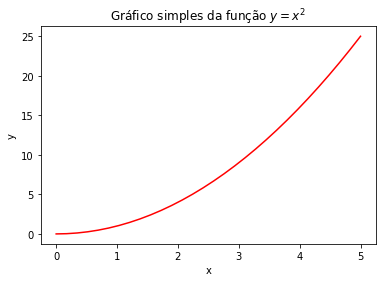

In [2]:
# Informa que os resultados gráficos devem ser mostrados dentro do Notebook:
%matplotlib inline 

# Importa a biblioteca  de geração de gráficos:
import matplotlib.pyplot as plt 

# Importa a biblioteca de geração de arranjos numéricos:
import numpy as np              

# Cria um arranjo (vetor) de 30 valores para x igualmente espaçados entre 0 e 5:
x = np.linspace(0, 5, 30)
y = x**2

# Plota y vs x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gráfico simples da função $y=x^2$');

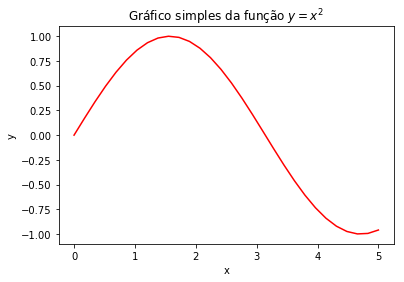

In [3]:
# Informa que os resultados gráficos devem ser mostrados dentro do Notebook:
%matplotlib inline 

# Importa a biblioteca  de geração de gráficos:
import matplotlib.pyplot as plt 

# Importa a biblioteca de geração de arranjos numéricos:
import numpy as np              

# Cria um arranjo (vetor) de 30 valores para x igualmente espaçados entre 0 e 5:
x = np.linspace(0, 5, 30)
y = np.sin(x)

# Plota y vs x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gráfico simples da função $y=x^2$');

Após executar o código, acima você deve ver a plotagem da equação $y = x^2$.

Você pode editar esse código e re-executá-lo. Por exemplo, tente mudar a equação $y = x^2$ por `y=np.sin(x)`. Dica: para não perder o código anterior, faça uma cópia da célula (menu *copy* e, depois, *paste-bellow*). Você também pode mudar o título do gráfico e as legendas das dimensões...

Para uma lista de funções válidas, veja o [Manual de Referência da Biblioteca NumPy](http://docs.scipy.org/doc/numpy/reference/routines.math.html). 

## Blocos interativos

Os **notebooks também podem ligar código com componentes de interface**, tais como *sliders, caixas de texto, combo boxes e check boxes*, os quais facilitam a exploração interativa. Aliás, essa é uma aplicação interessante da ferramenta para a área da educação e de simulação - leia a postagem sobre [Explorable Explanations de Bret Victor](http://worrydream.com/ExplorableExplanations/).

O seguinte exemplo foi criado para ilustrar os perigos do aliasing, que ocorre quando um sinal periódico de flutuação muito rápida é amostrado com pouca frequência, criando uma falsa impressão da verdadeira frequência do sinal. Segundo o autor, Ketcheson, 

>"As an undergraduate, I did some observational astronomy looking at variable stars. These are stars whose brightness oscillates, usually on a fairly regular basis. Many published results claim to measure how quickly the star's brightness oscillates - but actually report the oscillations at some multiple of the real answer, owing to insufficient observation and (as a result) aliasing."
This example shows how trying to reconstruct a simple sine wave signal from discrete measurements can fail. The sliders allow you to adjust the frequency of the underlying periodic sine wave signal (represented by frequency), and also how often the signal is sampled (represented by grid_points). Get it wrong, and a high-frequency sine wave is measured as a lower-frequency signal.

**Para ver os efeitos da técnica de aliasing nos dados coletados: **

1. **Execute a célula e ajuste o slider dos pontos de grade (grade_pontos) para 13;**
2. **Mova o slider de frequência para valores acima de 10.**

**Perceba que, com o aumento da frequência, o sinal mensurado (em azul) tem uma frequencia menor do que a real (em vermelho).**

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# A linha seguinite importa uma função que permite interagir com o usuário
# Ela é usada na sequência para criar um widget interativo
from ipywidgets import interact

def plot_sine(frequencia=4.0, grade_pontos=12, plotar_original=True):
    """
    Plota amostras discretas de uma onda sinoidal no intervalo ``[0, 1]``.
    """
    x = np.linspace(0, 1, grade_pontos + 2)
    y = np.sin(2 * frequencia  * np.pi * x)

    xf = np.linspace(0, 1, 1000)
    yf = np.sin(2 * frequencia * np.pi * xf)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('sinal')
    ax.set_title('Aliasing (graduação) em sinal periódico amostrado discretamente')

    if plotar_original:
        ax.plot(xf, yf, color='red', linestyle='solid', linewidth=2)

    ax.plot(x,  y,  marker='o', linewidth=2)

# A função 'interact' automaticamente constroi um componente interativo para explorar
# a função 'plot_sine'
interact(plot_sine, frequency=(1.0, 22.0, 0.5), grid_points=(10, 16, 1), plot_original=True);

interactive(children=(FloatSlider(value=4.0, description='frequencia', max=12.0, min=-4.0), IntSlider(value=12…

**Um último exemplo identifica e conta galáxias no campo de visão do Hubble.** Ele utiliza bibliotecas poderosas da linguagem Python (que abordam tudo relacionado com estatística e aprendizado de máquina para a análise de sinais e processamento de imagens). Este exemplo usa uma biblioteca de processamento de imagens (skikit-image) para identificar galáxias em uma imagem do céu obtida pelo Telescópio Espacial Hubble, tendo como base um algoritmo de detecção de características.

Depois de executar a célula, após alguns segundos, você pode brincar com os parâmetros do algoritmo de detecção para detectar galáxias de diferentes tamanhos.

O parâmetro ``max_sigma`` determina o tamanho máximo dos objetos a serem identificados. O ``threshold`` poded ser reduzido para detectar objetos menos proeminentes. 

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray
from ipywidgets import interact, fixed

# Extrai os 500 primeiros pixels quadrados do Hubble Deep Field
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plota a imagem e os blobs encontrados.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use interact to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001));

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


interactive(children=(IntSlider(value=30, description='max_sigma', max=40, min=10, step=2), FloatSlider(value=…

No seguinte link você encontra uma galeria de notebooks Jupyter interessantes: http://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks